## Visualization of the pulses

I include a pulse plot to show the complexity of the pulses.

In [1]:
from cryoelectronics.cryoel_model import amp_func_phase_control, n_t, total_t
import  matplotlib.pyplot as plt
from qopt import *
import os
import matplotlib
import numpy as np

latex_font = {'family': 'Times New Roman',
              'size': 10}
matplotlib.rc('font', **latex_font)
plt.rcParams["mathtext.fontset"] = "cm"


root_folder = r"C:\Users\julia\Desktop\SimulationData\Cryoelectronics"
continuous_folder = os.path.join(root_folder, "ContinuousOptimization")
assert os.path.isdir(continuous_folder)

identifier = "2022_09_23_first_execution"
c_dir = os.path.join(continuous_folder, identifier)


In [2]:
# load some optimized pulse
c_file = os.path.join(c_dir, "ContinuouslyOptimizedPulses")
data_continuous = DataContainer.from_pickle(c_file)

# chose values randomly
n = 2
pulse_pars = data_continuous.final_parameters[n]
pulse_vals = amp_func_phase_control(pulse_pars)

# Calculate the time steps
n_rep = 100
time = np.arange(n_t + 1) / n_t * total_t
# The physical signal in the lab frame requires a finer time sampling
time_signal = np.arange(n_t * n_rep) / n_t / n_rep * total_t

pulse_pars_rep = np.repeat(a=pulse_pars, repeats=n_rep, axis=0)
signal = pulse_pars_rep[:, 0] * np.cos(10 * time_signal + pulse_pars_rep[:, 1])


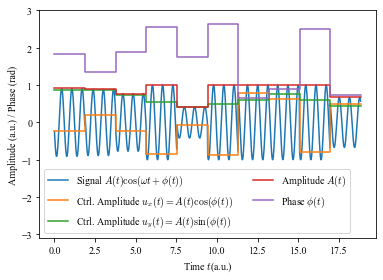

In [3]:

fig, axes = plt.subplots(1, 1, figsize=(395.45 / 72, 4))
axes.plot(time_signal, signal, label='Signal $A(t) \cos (\omega t + \phi(t))$')
axes.plot(time, np.append(pulse_vals[:, 0], pulse_vals[-1, 0]), drawstyle='steps-post', label='Ctrl. Amplitude $u_x(t)=A(t)\cos(\phi(t))$')
axes.plot(time, np.append(pulse_vals[:, 1], pulse_vals[-1, 1]), drawstyle='steps-post', label='Ctrl. Amplitude $u_y(t)=A(t)\sin(\phi(t))$')
axes.plot(time, np.append(pulse_pars[:, 0], pulse_pars[-1, 0]), drawstyle='steps-post', label='Amplitude $A(t)$')
axes.plot(time, np.append(pulse_pars[:, 1], pulse_pars[-1, 1]), drawstyle='steps-post', label='Phase $\phi(t)$')
axes.legend(ncol=2)
axes.set_ylim(-3.1, 3.)
axes.set_xlabel('Time $t$(a.u.)')
axes.set_ylabel('Amplitude (a.u.) / Phase (rad)')

fig.tight_layout()
fig.savefig(os.path.join(
    r"C:\Users\julia\Desktop\SimulationData\Cryoelectronics\Figures",
    "ExamplePulse.eps"
))